In [1]:
# Fixing updates to R for the below exercises

library(devtools)
packageurl <- "https://cran.r-project.org/src/contrib/Archive/dplyr/dplyr_1.0.4.tar.gz"
install.packages(packageurl, repos=NULL, type="source")
require(dplyr)
packageurl <- "https://cran.r-project.org/src/contrib/Archive/GGally/GGally_2.0.0.tar.gz"
install.packages(packageurl, repos=NULL, type="source")
install.packages('GGally')
library(GGally)
packageurl <- "https://cran.r-project.org/src/contrib/Archive/caTools/caTools_1.16.tar.gz"
install.packages(packageurl, repos=NULL, type="source")
library(caTools)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: ggplot2


In [2]:
# Capturing Libraries in a central location
library(plyr)
library(dplyr)
library(lubridate)
library(GGally)
library(caTools)
library(ggplot2)

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Attaching package: ‘lubridate’

The following object is masked from ‘package:plyr’:

    here

The following object is masked from ‘package:base’:

    date



## Variance Across Groups Exercises

There are many ways of doing feature reduction/extraction. 
We have seen how correlation between two variables can be used to exclude the features from a model. 
Highly correlated variables contribute less in explaining the variation in data because 
they vary in similar fashion; 
they more or less behave like same features. 
We have seen whether two features are independent or not using chi square test to see if the data in one 
feature is affecting how the data will be in other feature. 
We have seen how PCA tried to compress the data so that maximum variation in data is 
explained using minimal number of dimensions.

The last module tried to explain the variation of data within a feature 
and between features by analyzing variance. 

This technique will help you analyze variables at individual scale how different they are in different groups. Random forests helped determine the importance of variables for fitting the model.

In this exercise, use the techniques of module 8 and the previous modules to predict the forest cover type from the provided data set. 
Some of the exercises are partially complete. 
You have to complete the code or modify the code in order to get the desired output. 
Some of the exercises may be challenging as they might not be directly discussed in the lab or practice notebooks. 
Sufficient guidance and hints are provided for you to look up for the functions or the description is 
provided on how to solve the problem. Use this guidance for answering the questions. 

### Data

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. 
Each observation is a 30m x 30m patch. 
You are asked to predict an integer classification for the forest cover type. 
The seven types are:


#### Forest cover types

* Spruce/Fir
* Lodgepole Pine
* Ponderosa Pine
* Cottonwood/Willow
* Aspen
* Douglas-fir
* Krummholz

#### Data Fields

* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* lope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
* Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation




#### The wilderness areas are:

* Rawah Wilderness Area
* Neota Wilderness Area
* Comanche Peak Wilderness Area
* Cache la Poudre Wilderness Area

From [kaggle.com](https://www.kaggle.com/c/forest-cover-type-prediction/data)




Load the dataset from 'dsa/data/all_datasets/Forest/forest_cover.csv'

In [3]:
forest_cover = read.csv("/dsa/data/all_datasets/Forest/forest_cover.csv")
head(forest_cover)

Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,⋯,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2596,51,3,258,0,510,221,232,148,⋯,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,⋯,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,⋯,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,⋯,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,⋯,0,0,0,0,0,0,0,0,0,5
6,2579,132,6,300,-15,67,230,237,140,⋯,0,0,0,0,0,0,0,0,0,2


In [4]:
str(forest_cover)

'data.frame':	15120 obs. of  56 variables:
 $ Id                                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Elevation                         : int  2596 2590 2804 2785 2595 2579 2606 2605 2617 2612 ...
 $ Aspect                            : int  51 56 139 155 45 132 45 49 45 59 ...
 $ Slope                             : int  3 2 9 18 2 6 7 4 9 10 ...
 $ Horizontal_Distance_To_Hydrology  : int  258 212 268 242 153 300 270 234 240 247 ...
 $ Vertical_Distance_To_Hydrology    : int  0 -6 65 118 -1 -15 5 7 56 11 ...
 $ Horizontal_Distance_To_Roadways   : int  510 390 3180 3090 391 67 633 573 666 636 ...
 $ Hillshade_9am                     : int  221 220 234 238 220 230 222 222 223 228 ...
 $ Hillshade_Noon                    : int  232 235 238 238 234 237 225 230 221 219 ...
 $ Hillshade_3pm                     : int  148 151 135 122 150 140 138 144 133 124 ...
 $ Horizontal_Distance_To_Fire_Points: int  6279 6225 6121 6211 6172 6031 6256 6228 6244 6230 ...
 $ Wilderness_Area1    

The Cover_Type variables has 7 different classes of vegetation. 
Encode the coverType variable to replace the old values (1,2,3,4,5,6,7) with corresponding labels 


* 1.SpruceFir
* 2.LodgepolePine
* 3.PonderosaPine
* 4.Cottonwood-Willow
* 5.Aspen
* 6.Douglas-fir
* 7.Krummholz

Also the columns Wilderness_Area1 through Wilderness_Area4 are mutually exclusive. 
They contain binary values, 1 if the row belongs to certain wilderness type or 0 otherwise. 
Like wise the variables soil_Type1 through soil_Type40 are mutually exclusive containing binary values. 
The column will have a 1 if soil_Type of certain type or 0 otherwise.  

**Activity 1:** Encode the Cover_Type variable to replace the old values (1,2,3,4,5,6,7) with corresponding labels using mapvalues() function in plyr package.

In [5]:
# Your code for activity 1 goes here..

require(plyr) # Always load plyr package first if you have to use both plyr and dplyr. Because
              # dplyr package will mask some of the functions in plyr.
require(dplyr)  #Use require as it will give an error message if the package doesn't exist
require(lubridate)

forest_cover$Cover_Type <- mapvalues(forest_cover$Cover_Type, from = c(1,2,3,4,5,6,7), 
to = c("1.SpruceFir","2.LodgepolePine","3.PonderosaPine","4.Cottonwood-Willow","5.Aspen","6.Douglas-fir","7.Krummholz"))

`mapvalues()` with map the values in from i'e 1,2,3... 
to corresponding values in to i'e 1.SpruceFir, 2.LodgepolePine,...

**Reference: **[mapvalues()](https://www.rdocumentation.org/packages/plyr/versions/1.8.4/topics/mapvalues)

In [6]:
# Run below commands for a quick brief info on the libraries on what they do.

# help(lubridate)
# help(plyr)
# help(dplyr)

**Activity 2:** Plot a bar graph for the observations of each Cover_Type. 
Use dplyr to first get the count of 7 cover types and normalize the count by dividing it by total rows in forest_cover dataset.

In [7]:
# # Code for activity 2 goes here...

library(ggplot2)

# # forest_cover data is supplied to group_by() function to group the data based on Cover_Type. 
# # This 7 groups of data formed above is supplied as input to summarize() where we are getting the 
# # count of observations stored in the variable count. cover_type_ratio is created to store the 
# # ratio of cover type. 

coverType_count = forest_cover %>%  
  group_by(Cover_Type) %>%    # data is grouped according to labels (1,2,3,4,5,6,7) of cover type
  dplyr::summarize(count = n()) %>%  # count the number of observations in each group
  mutate(cover_type_ratio=count/sum(count)) # divide the counts obtained in above step to get the ratio.
                                           
# # Display the contents of the variable coverType_count
coverType_count

Cover_Type,count,cover_type_ratio
<chr>,<int>,<dbl>
1.SpruceFir,2160,0.1428571
2.LodgepolePine,2160,0.1428571
3.PonderosaPine,2160,0.1428571
4.Cottonwood-Willow,2160,0.1428571
5.Aspen,2160,0.1428571
6.Douglas-fir,2160,0.1428571
7.Krummholz,2160,0.1428571


In [8]:
# head(forest_cover)

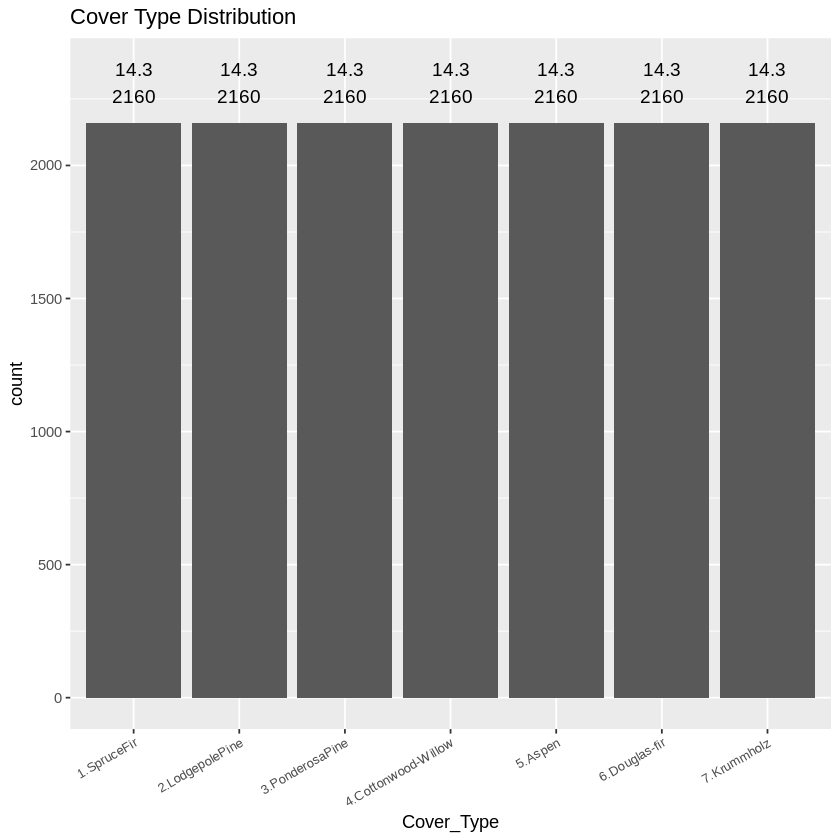

In [9]:
# Code for activity 2 continues here.

# plot the distribution of cover type using the dataframe "coverType_count" created above. 
plot<-ggplot(coverType_count, aes(x=Cover_Type, y=count)) +   
  geom_bar(stat="identity") + # plot a bar graph 
  scale_y_continuous() + 
  geom_text(data=coverType_count, aes(label=count,y=count+100),size=4) + # Display the count for each category 
                    # at y position "count(2160)+100". This will display the value right above the bars.
  geom_text(data=coverType_count, aes(label=(round(cover_type_ratio, digits=3)*100),y=count+200),size=4)+
                    # Display the count percentage rounded to one decimal place at y position "count(2160)+200". This  
                    # will display the ratios right above the counts printed in previous steps.          

                    # You should convert the ratio 0.1428571 to 14.3% for printing in above step.

  theme(axis.text.x=element_text(angle=30,hjust=1,size=8))+ # code to adjust the indices on x-axis 
                                                            # tilted. Play with the code to see what each parameter is doing.
  ggtitle('Cover Type Distribution')

plot

The forest cover is equally distributed with 7 different types as evident from above plot. 

**Activity 3:** The names of some of the variables are too long. Modify the column names as listed.

In [10]:
?setnames

In [11]:
oldnames<-c("Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
                  "Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points","Hillshade_9am",
                  "Hillshade_Noon","Hillshade_3pm")

newnames<-c("Elevation","Aspect","Slope","HD.Hydro","VD.Hydro","HD.Road","HD.Fire","HS.9am","HS.noon","HS.3pm")

library(data.table)

# Your code for activity 3 goes here.
setnames(forest_cover, oldnames, newnames)


Attaching package: ‘data.table’

The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from ‘package:dplyr’:

    between, first, last



In [12]:
head(forest_cover)

Id,Elevation,Aspect,Slope,HD.Hydro,VD.Hydro,HD.Road,HS.9am,HS.noon,HS.3pm,⋯,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,2596,51,3,258,0,510,221,232,148,⋯,0,0,0,0,0,0,0,0,0,5.Aspen
2,2590,56,2,212,-6,390,220,235,151,⋯,0,0,0,0,0,0,0,0,0,5.Aspen
3,2804,139,9,268,65,3180,234,238,135,⋯,0,0,0,0,0,0,0,0,0,2.LodgepolePine
4,2785,155,18,242,118,3090,238,238,122,⋯,0,0,0,0,0,0,0,0,0,2.LodgepolePine
5,2595,45,2,153,-1,391,220,234,150,⋯,0,0,0,0,0,0,0,0,0,5.Aspen
6,2579,132,6,300,-15,67,230,237,140,⋯,0,0,0,0,0,0,0,0,0,2.LodgepolePine


**Activity 4:** Create box plots for each of the variables listed above in activity 3. 


`Follow the partial code below to complete it`: 

The code may look little dense but its because of the for loop we are running. 
The loop will capture each plot in an array. Ignore the for loop for some time and look at the code inside. It's a regular simple box plot. 

Use aes_string(y=newnames[i],x="Cover_Type") inside ggplot(). 
It means, x axis will be Cover_type and y-axis will be the variable in the list "newnames". 
The for loop will repeat 10 times for the 10 variables in the list to produce 10 box plots. 

$1^{st}$ box plot would be between Elevation and Cover_Type

$2^{st}$ box plot would be between Aspect and Cover_Type and so on


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



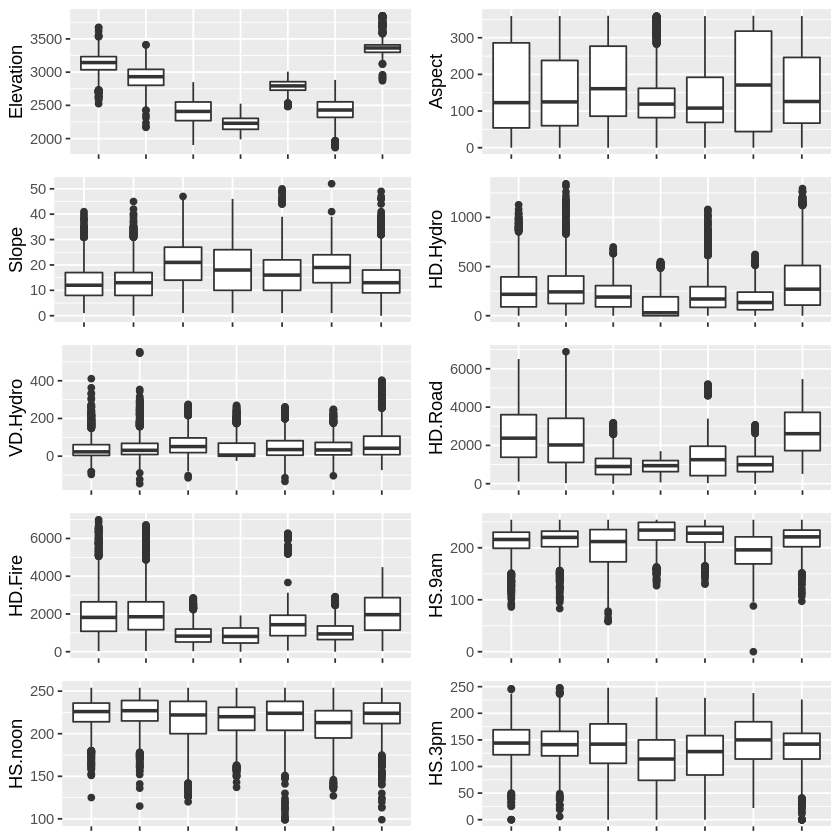

In [13]:
# Your code for activity 4 goes here....

p=list()
for(i in 1:length(newnames)){
  p[[i]] <- ggplot(forest_cover, aes_string(y=newnames[i],x="Cover_Type")) + 
              geom_boxplot() + 
              theme(axis.text.x=element_blank(),axis.title.x=element_blank()) # This line will keep the
               # x-axis label and title of each plot empty.
  }

# Arrange the plots in a grid using grid.arrange() in grid.Extra package. Arrange 2 plots in a row.
library(gridExtra)
grid.arrange(p[[1]],p[[2]],p[[3]],p[[4]],p[[5]],p[[6]],p[[7]],p[[8]],p[[9]],p[[10]],
    ncol=2) # ncol will arrange two plots in each row.

**Activity 5:** 
Find correlation between the columns 2 to 10 in forest_cover. 
The first column is ID. So ignore it. The rest of the columns have binary values. 
Use `ggcorr()` function in GGally package. 

**Reference: **[ggcorr()](https://briatte.github.io/ggcorr/)

In [14]:
# install.packages('GGally')
# library(GGally)
require(GGally)

In [15]:
# Run the cell to learn more about the ggcorr() function parameters.
help(ggcorr)

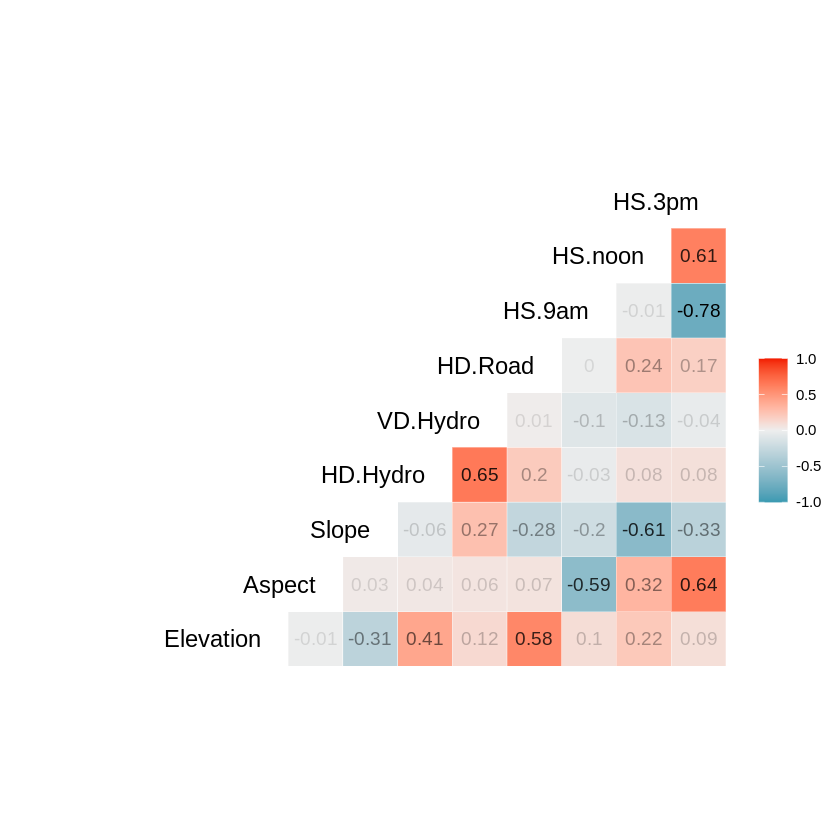

In [16]:
# Your code for activity 5 goes here....

corr_plot<-ggcorr(forest_cover[,2:10], label=TRUE, label_size=4, label_round = 2, label_alpha=TRUE,
                  hjust = 1, size=5, layout.exp=4) 
                           # Run help(ggcorr) for documentation
    
# label indicates to add correlation coefficients to the plot.

# label_size indicates size of the correlation coefficients

# label_round : indicates how many decimals the correlation coefficiens should be rounded

# label_alpha: indicates whether the correlation coefficients be made increasingly transparent as they 
# come close to 0. 

# hjust: will adjust the position of labels Elevation , Aspect etc horizontally from the plot. 
# Change the value to 0 and 4 to understand how it works.

# size: indicates size of the labels Elevation, Aspect etc. Change the number to 10 to see how it works.

# layout.exp: Its a multiplier to expand the horizontal axis to the left if variable names get clipped. 


# Plot the correlation plot created above.
corr_plot

--- 

**Activity 6:** Identify the pairs of variables which have a correlation of greater than 0.5 and less than -0.5 using above correlation plot and draw scatter plots for each pair of variables. 

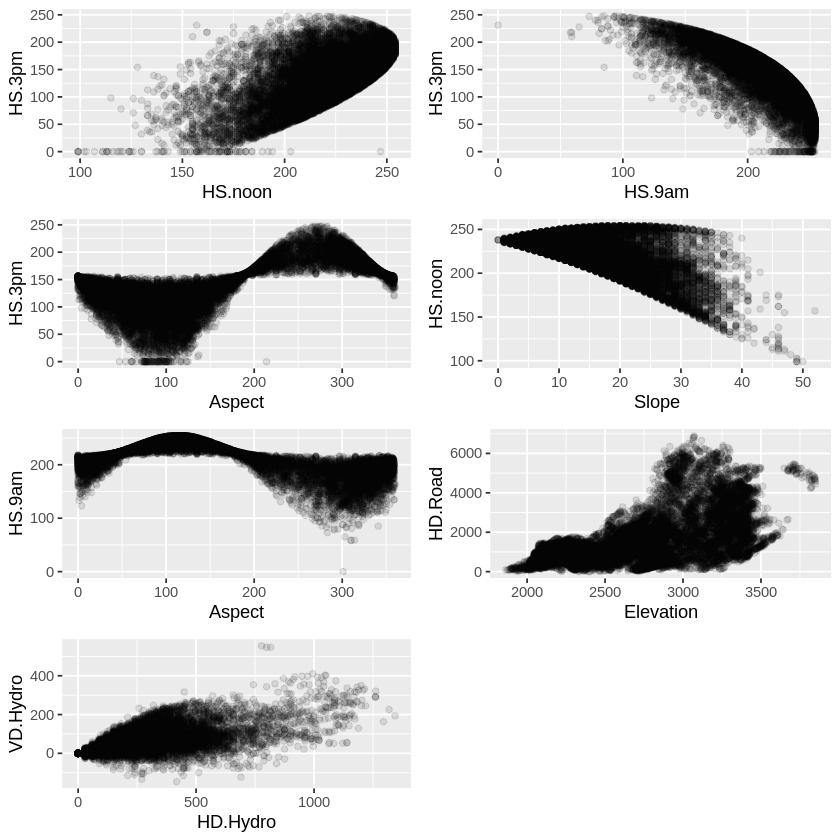

In [17]:
# Your code for activity 6 goes here....

# For example HS.noon is correlated with HS.3pm
corrFeature1<-c('HS.3pm', 'HS.3pm', 'HS.3pm', 'HS.noon', 'HS.9am', 'HD.Road', 'VD.Hydro') # So you will include HS.noon in this list
corrFeature2<-c('HS.noon', 'HS.9am', 'Aspect', 'Slope', 'Aspect', 'Elevation', 'HD.Hydro') # Corresponding feature HS.3pm is included in the list 
                                                                        # in the same position as one to one mapping.

# scatterTemp<-sample_n(forest_cover,10000)

p=list()
for(i in 1:length(corrFeature1)){
  p[[i]] <- ggplot(forest_cover, aes_string(y=corrFeature1[i],x=corrFeature2[i])) +
              geom_point(alpha=1/10)
                   }

# Arrange the plots in a grid using grid.arrange() in grid.Extra package. Arrange 2 plots in a row.
library(gridExtra)
grid.arrange(p[[1]], p[[2]], p[[3]], p[[4]], p[[5]], p[[6]], p[[7]],
    ncol=2) # ncol=2 will arrange two plots in each row.


The columns Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4 are mutually exclusive. That means we can fuse these columns into one column. 

Combine the 4 columns listed above into one single column called wildernessArea. Assign the labels Rawah, Neota, ComanchePeak, CachePoudre for each row of wildernessArea where the row belongs to one of the 4 categories.

In [18]:
# Recode the Lables for the "wildernessArea" to one column. 

# Existing column names. These 4 columns have to be fused into one column called wildernessArea
oldCols <- c("Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Wilderness_Area4")

# New labels that are to be assigned to each row in wildernessArea corresponding to the category 
# of wilderness_Area it belongs
newLabels <- c("Rawah","Neota","ComanchePeak","CachePoudre")

# forest_cover is a dataframe. Convert it into a data.table to assign values using := operator.
forest_cover=data.table(forest_cover)
is.data.table(forest_cover) # make sure forest_cover is a data.table. 

for(i in 1:length(newLabels)) { # Loop for 4 times. length(newLabels) is 4. 
   refColumn<-oldCols[i] # Take the name in vector oldCols according to the loop count. oldCols[1] 
                         # will give Wilderness_Area1.
   refValue<-newLabels[i]  # Take the name in vector newLabels according to the loop count. 
                         # newLabels[1] will give Rawah
    
   forest_cover<-forest_cover[get(refColumn)==1,wildernessArea:=refValue]
}
# get(refColumn) will return the column. For example get(refColumn) returned Wilderness_Area1.
    # Then for every value 1 in Wilderness_Area1, wildernessArea will be assigned the value Rawah.
    
    # Or if get(refColumn) returned Wilderness_Area2.
    # Then for every value 1 in Wilderness_Area2, wildernessArea will be assigned the value Neota. 
    # This will continue for remaining two columns. 
    # Finally one fused column wildernessArea with recoded values Rawah, Neota etc is formed.

[1] TRUE

In [19]:
# Run the cell to understand how assignment operator(:=) works.
help(":=")

Repeat the same thing for columns Soil_Type1, Soi_Type2 and so on until Soil_Type40. Even these columns are mutually exclusive. That means we can fuse these columns into one column without losing any data. 

Combine the into one single column called soilType. Assign the new labels for each row of soilType where the row belongs to one of the 40 categories.

In [20]:
#Recode the Lables for the "Soil_Type" to one column called soilType. 
newLabels<-c('Cathedral','Vanet','Haploborolis','Ratake','Vanet1','Vanet2','Gothic','Supervisor',
             'Troutville','Bullwark1','Bullwark2','Legault','Catamount1','Pachic','unspecified',
             'Cryaquolis','Gateview','Rogert','Typic1','Typic2','Typic3','Leighcan1','Leighcan2',
             'Leighcan3','Leighcan4','Granile','Leighcan5','Leighcan6','Como1','Como2','Leighcan7',
             'Catamount2','Leighcan8','Cryorthents','Cryumbrepts','Bross','Rock','Leighcan9','Moran1',
             'Moran2')

oldCols <- c("Soil_Type1","Soil_Type2","Soil_Type3","Soil_Type4","Soil_Type5","Soil_Type6","Soil_Type7","Soil_Type8",
"Soil_Type9","Soil_Type10","Soil_Type11","Soil_Type12","Soil_Type13","Soil_Type14","Soil_Type15","Soil_Type16",
"Soil_Type17","Soil_Type18","Soil_Type19","Soil_Type20","Soil_Type21","Soil_Type22","Soil_Type23","Soil_Type24",
"Soil_Type25","Soil_Type26","Soil_Type27","Soil_Type28","Soil_Type29","Soil_Type30","Soil_Type31","Soil_Type32",
"Soil_Type33","Soil_Type34","Soil_Type35","Soil_Type36","Soil_Type37","Soil_Type38","Soil_Type39","Soil_Type40")

# The following code is same as previous cell.
for(i in 1:length(newLabels)) {
   refColumn<-oldCols[i]
   refValue<-newLabels[i]
   forest_cover<-forest_cover[get(refColumn)==1,soilType:=refValue]
}


# Remove the binary columns Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4 and 
# other 40 columns of soil type. These binary column span from 12 through 55 columns. 
# Assign the these columns to NULL to delete them.

forest_cover <- forest_cover[ , colnames(forest_cover[,12:55,with=FALSE]):=NULL]

# In following line of code, colnames(forest_cover[,12:55,with=FALSE]):=NULL all columns 12 through 55 are
# assigned to NULL to delete them.

# with = FALSE, means the columns 12:55 will be a character vector of column names or a numeric vector 
# of column positions to select, and the value returned is always a data.table. 

In [21]:
# Understand the difference between with=TRUE and with=FALSE by looking at the output of the cell. Run help(data.table) to know 
# more about with operator and data.table
temp <- forest_cover[ , colnames(forest_cover[,1:5,with=TRUE])]
dim(temp)

temp <- forest_cover[ , colnames(forest_cover[,1:5,with=FALSE])]
(temp)

NULL

[1] "Id"        "Elevation" "Aspect"    "Slope"     "HD.Hydro"

In [22]:
# Run the cell to learn more about how data.table is different from dataframe.
help(data.table)

In [23]:
# Run str() to verify Wilderness_Area columns and soil_Type columns are merged and all those binary columns are deleted.
str(forest_cover)

Classes ‘data.table’ and 'data.frame':	15120 obs. of  14 variables:
 $ Id            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Elevation     : int  2596 2590 2804 2785 2595 2579 2606 2605 2617 2612 ...
 $ Aspect        : int  51 56 139 155 45 132 45 49 45 59 ...
 $ Slope         : int  3 2 9 18 2 6 7 4 9 10 ...
 $ HD.Hydro      : int  258 212 268 242 153 300 270 234 240 247 ...
 $ VD.Hydro      : int  0 -6 65 118 -1 -15 5 7 56 11 ...
 $ HD.Road       : int  510 390 3180 3090 391 67 633 573 666 636 ...
 $ HS.9am        : int  221 220 234 238 220 230 222 222 223 228 ...
 $ HS.noon       : int  232 235 238 238 234 237 225 230 221 219 ...
 $ HS.3pm        : int  148 151 135 122 150 140 138 144 133 124 ...
 $ HD.Fire       : int  6279 6225 6121 6211 6172 6031 6256 6228 6244 6230 ...
 $ Cover_Type    : chr  "5.Aspen" "5.Aspen" "2.LodgepolePine" "2.LodgepolePine" ...
 $ wildernessArea: chr  "Rawah" "Rawah" "Rawah" "Rawah" ...
 $ soilType      : chr  "Como1" "Como1" "Legault" "Como2" ...
 - attr(*, "

The forest_cover is ready for fitting a model on it. The binary columns are removed and converted into 
factor types. 

In [24]:
# Use setcolorder() function to reorder the columns in a dataset.
colOrder<-c("Id","Elevation","Aspect","Slope","HD.Hydro","VD.Hydro","HD.Road","HD.Fire","HS.9am","HS.noon","HS.3pm","Cover_Type","wildernessArea","soilType")

# Rearrange the columns of forest_cover according to above order.
setcolorder(forest_cover, colOrder)

# Shorten the names of columns for readability.
setnames(forest_cover,colOrder)

# Remove the Id column from forest_cover.
forest_cover$Id=NULL

**Reference: **

* [setcolorder()](https://www.rdocumentation.org/packages/data.table/versions/1.9.6/topics/setcolorder) : orders the columns of data.table, by reference, to the new order provided.

* [setnames](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/setNames.html): This is a convenience function that sets the names on an object and returns the object.

---
**Activity 7:** Calculate feature importance of the variables in forest_cover 
(1) using Random Forest, then 
(2) printing out the variable importance table and 
(3) variable importance plot. 


randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:gridExtra’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine



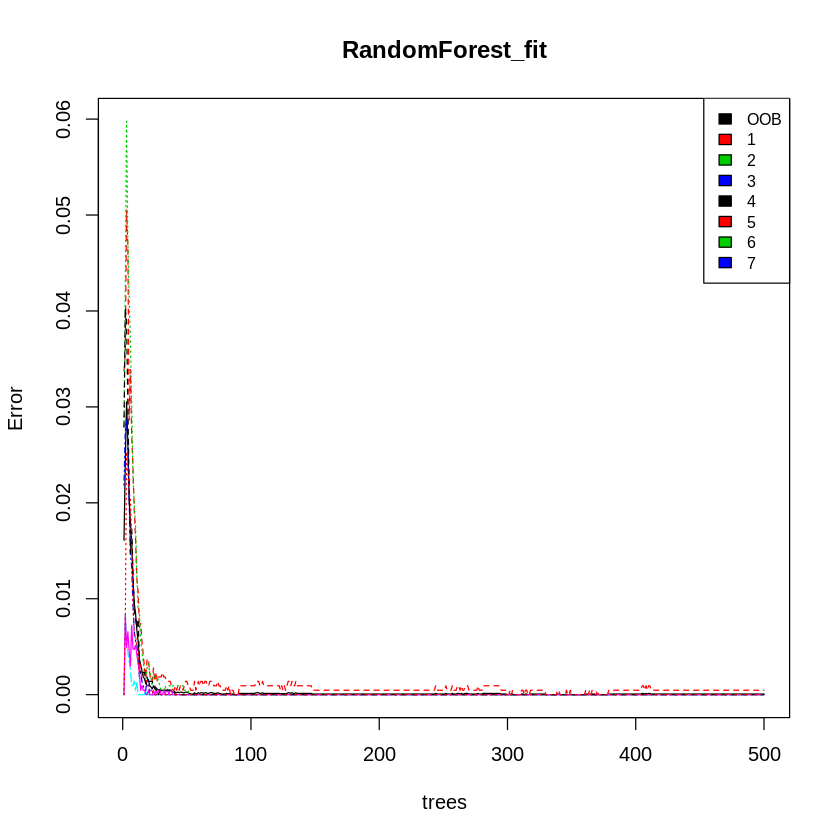

In [25]:
library(randomForest)

forest_cover$Cover_Class <- factor(forest_cover$Cover_Type,
levels = c("1.SpruceFir","2.LodgepolePine","3.PonderosaPine","4.Cottonwood-Willow","5.Aspen","6.Douglas-fir","7.Krummholz"),
labels = c(1,2,3,4,5,6,7))

# Your code for activity 7.1 goes here...

# Adding additional code to coerce the 'char' columns into factors, otherwise the randomForest won't run

forest_cover=forest_cover %>% mutate_if(is.character, as.factor)

RandomForest_fit <- randomForest(Cover_Class~.,
                                 method="class",
                                 data=forest_cover, importance=TRUE) 

plot(RandomForest_fit)
legend("topright", colnames(RandomForest_fit$err.rate),col=1:4,cex=0.8,fill=1:4)
forest_cover$Cover_Class <- NULL

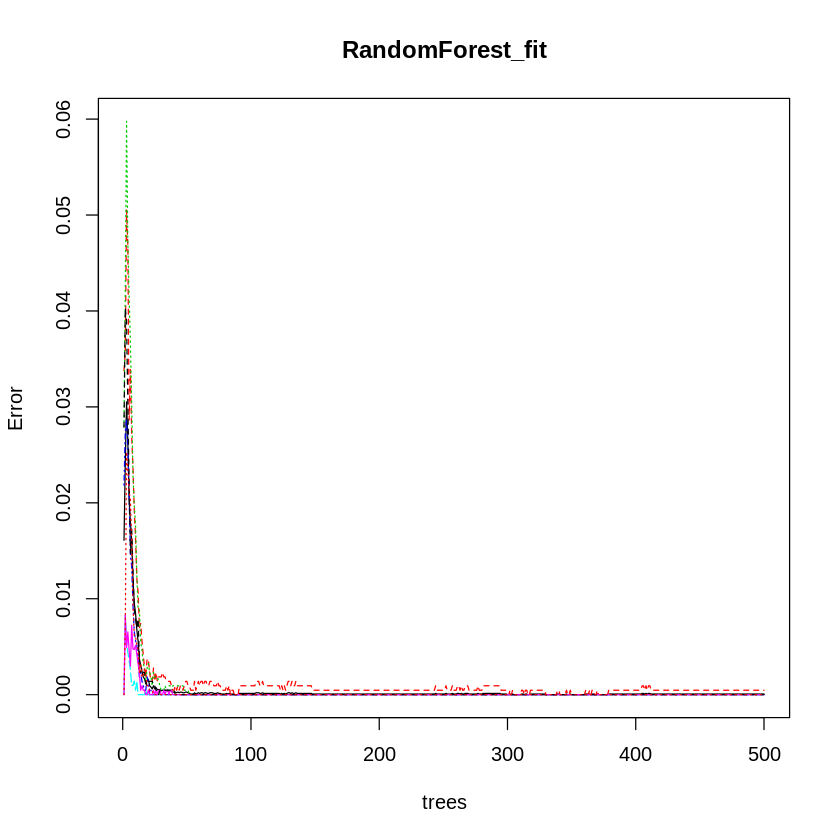

In [26]:
# Code for activity 7.2 continues here...

plot(RandomForest_fit)


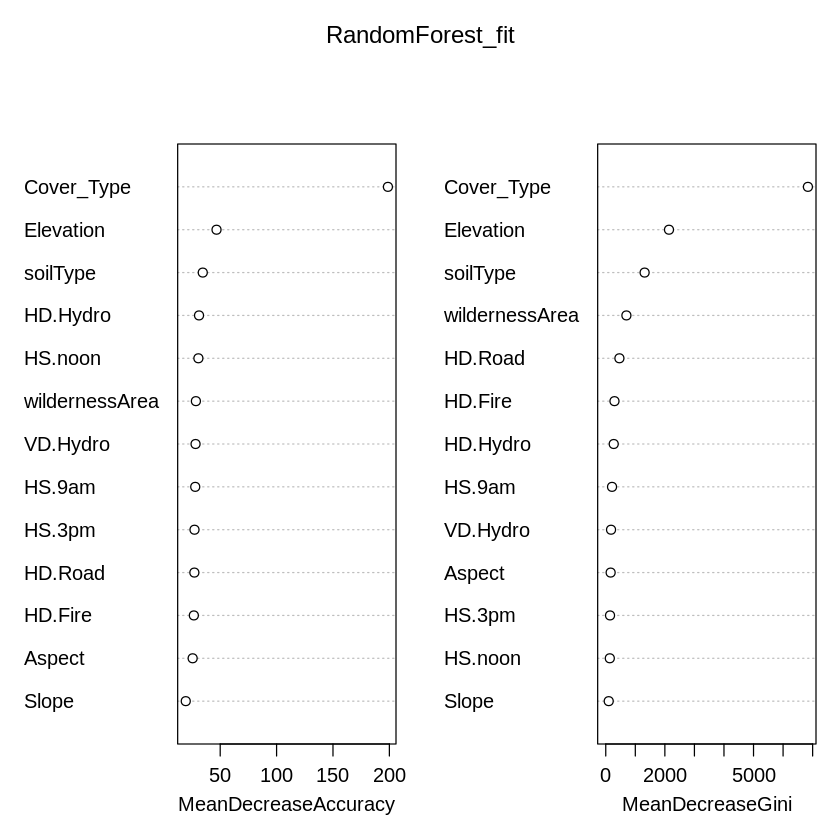

In [27]:
# Code for activity 7.3 continues here...

varImpPlot(RandomForest_fit)

#### Feature Importance

The feature importance of the 13 columns, with respect to Cover_Type variable is calculated above.
The table is presented below with importance of each variable calculated from the random forest importance function.
Additionally, you have plotted the most important variables.
Elevation is the top feature.

---
**Activity 8:** Split the data into training and testing sets. Put 70% of data in "Forestcover_train" dataframe and rest in "Forestcover_test" dataframe. Use the seed as 100 to reproduce test results for evaluation. 

Testing set will be used to evaluate the predictive capability of the model.

In [28]:
# Your code for activity 8 goes here. 

# Be care ful in splitting the data. Set the seed as 100 for consistency in the results across everyone's notebooks. 
# use sample.split() function for splitting the data into 70% in training and rest in testing sets.
# Split the data on forest_cover$Cover_Type not on forest_cover.

install.packages('caTools')
library(caTools)
set.seed(100) # set.seed() will help us to reproduce the results.
split = sample.split(forest_cover$Cover_Type, SplitRatio = 0.7)

Forestcover_train <- forest_cover[split,]
Forestcover_test <- forest_cover[!split,]
nrow(Forestcover_train)
nrow(Forestcover_test)

Warning message:
“package ‘caTools’ is not available (for R version 3.5.1)”

[1] 10584

[1] 4536

Using this importance information of the variables, choose to include between variables while fiting the model. Fit a classification model using LDA or SVC. Start with LDA. Cover_Type is character type. Convert the variable to factor with levels (1,2,3,4,5,6,7). 

In [29]:
class(Forestcover_train$Cover_Type)

[1] "factor"

Convert the Cover_Type from character to factor type in both training and testing sets. Substitue the labels from names of Cover_Type to numbers (1,2,3,4,5,6,7) for fitting the model. 

Do the same thing for soilType. Convert the variable from character to factor type. Substitue soil type names with intergers 1:40.

In [30]:
Forestcover_train$Cover_Type <- factor(Forestcover_train$Cover_Type,
levels = c("1.SpruceFir","2.LodgepolePine","3.PonderosaPine","4.Cottonwood-Willow","5.Aspen","6.Douglas-fir","7.Krummholz"),
labels = c(1,2,3,4,5,6,7))

Forestcover_test$Cover_Type <- factor(Forestcover_test$Cover_Type,
levels = c("1.SpruceFir","2.LodgepolePine","3.PonderosaPine","4.Cottonwood-Willow","5.Aspen","6.Douglas-fir","7.Krummholz"),
labels = c(1,2,3,4,5,6,7))


Forestcover_train$soilType <- factor(Forestcover_train$soilType,
levels = c('Cathedral','Vanet','Haploborolis','Ratake','Vanet1','Vanet2','Gothic','Supervisor',
             'Troutville','Bullwark1','Bullwark2','Legault','Catamount1','Pachic','unspecified',
             'Cryaquolis','Gateview','Rogert','Typic1','Typic2','Typic3','Leighcan1','Leighcan2',
             'Leighcan3','Leighcan4','Granile','Leighcan5','Leighcan6','Como1','Como2','Leighcan7',
             'Catamount2','Leighcan8','Cryorthents','Cryumbrepts','Bross','Rock','Leighcan9','Moran1',
             'Moran2'),
labels = c(1:40))

Forestcover_test$soilType <- factor(Forestcover_test$soilType,
levels = c('Cathedral','Vanet','Haploborolis','Ratake','Vanet1','Vanet2','Gothic','Supervisor',
             'Troutville','Bullwark1','Bullwark2','Legault','Catamount1','Pachic','unspecified',
             'Cryaquolis','Gateview','Rogert','Typic1','Typic2','Typic3','Leighcan1','Leighcan2',
             'Leighcan3','Leighcan4','Granile','Leighcan5','Leighcan6','Como1','Como2','Leighcan7',
             'Catamount2','Leighcan8','Cryorthents','Cryumbrepts','Bross','Rock','Leighcan9','Moran1',
             'Moran2'),
labels = c(1:40))

**Activity 8.a:** Convert the variable wildernessArea into a factor with labels 1,2,3,4. Perform anova between variables 
wildernessArea and first 5 important features according to random forest importance.

In [31]:
unique(forest_cover$wildernessArea)

[1] Rawah        ComanchePeak CachePoudre  Neota       
Levels: CachePoudre ComanchePeak Neota Rawah

In [32]:
# Your code for activity 8.a goes here.
Forestcover_train$wildernessArea <- factor(Forestcover_train$wildernessArea,
levels = c("Rawah", "ComanchePeak", "CachePoudre", "Neota"),
labels = c(1,2,3,4))

Forestcover_test$wildernessArea <- factor(Forestcover_test$wildernessArea,
levels = c("Rawah", "ComanchePeak", "CachePoudre", "Neota"),
labels = c(1,2,3,4))


In [33]:
# ANOVA
# Total ANOVA

fit_ANOVA_forest <- aov(as.numeric(wildernessArea) ~ Elevation*soilType*HD.Hydro*HS.noon*HS.9am, data=Forestcover_train)
summary(fit_ANOVA_forest)

                                              Df Sum Sq Mean Sq   F value
Elevation                                      1 1737.8  1737.8 10506.118
soilType                                      36 2476.2    68.8   415.838
HD.Hydro                                       1    7.0     7.0    42.293
HS.noon                                        1    0.4     0.4     2.144
HS.9am                                         1   15.2    15.2    91.949
Elevation:soilType                            35  488.4    14.0    84.362
Elevation:HD.Hydro                             1   17.8    17.8   107.333
soilType:HD.Hydro                             35   78.5     2.2    13.566
Elevation:HS.noon                              1    0.3     0.3     1.702
soilType:HS.noon                              35   36.9     1.1     6.374
HD.Hydro:HS.noon                               1    0.0     0.0     0.007
Elevation:HS.9am                               1    6.8     6.8    41.242
soilType:HS.9am                       

Starting the 5 Individual ANOVA tests

In [51]:
# ANOVA
fit_ANOVA_forest <- aov(as.numeric(wildernessArea) ~ Elevation, data=Forestcover_train)
summary(fit_ANOVA_forest)

               Df Sum Sq Mean Sq F value Pr(>F)    
Elevation       1   1738  1737.8    3561 <2e-16 ***
Residuals   10582   5164     0.5                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [52]:
# ANOVA
fit_ANOVA_forest <- aov(as.numeric(wildernessArea) ~ soilType, data=Forestcover_train)
summary(fit_ANOVA_forest)

               Df Sum Sq Mean Sq F value Pr(>F)    
soilType       36   4082  113.38   424.1 <2e-16 ***
Residuals   10547   2820    0.27                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [53]:
# ANOVA
fit_ANOVA_forest <- aov(as.numeric(wildernessArea) ~ HD.Hydro, data=Forestcover_train)
summary(fit_ANOVA_forest)

               Df Sum Sq Mean Sq F value Pr(>F)    
HD.Hydro        1     57   57.01   88.13 <2e-16 ***
Residuals   10582   6845    0.65                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [54]:
# ANOVA
fit_ANOVA_forest <- aov(as.numeric(wildernessArea) ~ HS.noon, data=Forestcover_train)
summary(fit_ANOVA_forest)

               Df Sum Sq Mean Sq F value Pr(>F)    
HS.noon         1     61   60.74   93.96 <2e-16 ***
Residuals   10582   6841    0.65                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [55]:
# ANOVA
fit_ANOVA_forest <- aov(as.numeric(wildernessArea) ~ HS.9am, data=Forestcover_train)
summary(fit_ANOVA_forest)

               Df Sum Sq Mean Sq F value Pr(>F)    
HS.9am          1    197  196.98   310.9 <2e-16 ***
Residuals   10582   6705    0.63                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**Activity 8.b:** Perform manova first 5 important features according to random forest importance against wildernessArea.

In [34]:
# Your code for activity 8.b goes here.
summary(manova(cbind(Elevation, soilType, HD.Hydro, HS.noon, HS.9am) ~ as.numeric(wildernessArea), 
                                    data = Forestcover_train), test = "Hotelling-Lawley")

                              Df Hotelling-Lawley approx F num Df den Df
as.numeric(wildernessArea)     1          0.40953   866.39      5  10578
Residuals                  10582                                        
                              Pr(>F)    
as.numeric(wildernessArea) < 2.2e-16 ***
Residuals                               
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**Activity 9:** Fit a LDA model on Forestcover_train to predict Cover_Type using all independent variables except soilType. Name this model as Forestcover_lda.

In [35]:
colnames(forest_cover)

[1] "Elevation"      "Aspect"         "Slope"          "HD.Hydro"      
 [5] "VD.Hydro"       "HD.Road"        "HD.Fire"        "HS.9am"        
 [9] "HS.noon"        "HS.3pm"         "Cover_Type"     "wildernessArea"
[13] "soilType"


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



Call:
lda(Cover_Type ~ Elevation + Aspect + Slope + HD.Hydro + VD.Hydro + 
    HD.Road + HD.Fire + HS.9am + HS.noon + HS.3pm + wildernessArea, 
    data = Forestcover_train)

Prior probabilities of groups:
        1         2         3         4         5         6         7 
0.1428571 0.1428571 0.1428571 0.1428571 0.1428571 0.1428571 0.1428571 

Group means:
  Elevation   Aspect    Slope HD.Hydro VD.Hydro   HD.Road   HD.Fire   HS.9am
1  3127.023 159.4140 13.26653 268.9279 40.70503 2549.8519 1995.3988 211.2963
2  2922.884 151.9015 13.60582 285.7083 47.89484 2436.9220 2155.3373 213.6991
3  2402.894 171.7407 20.48214 211.3485 63.91336  996.7937  929.0939 202.3320
4  2222.927 139.4993 18.69246 106.3274 40.87500  919.7328  852.4610 228.1693
5  2784.754 139.0648 16.71032 205.0946 49.54034 1335.2447 1526.2255 222.6878
6  2424.968 179.9854 18.91601 159.6475 44.04167 1079.6601 1071.7784 193.8763
7  3364.399 154.6772 14.07474 352.1759 70.48611 2705.8095 2053.1356 216.9742
   HS.noon   HS.3pm wi

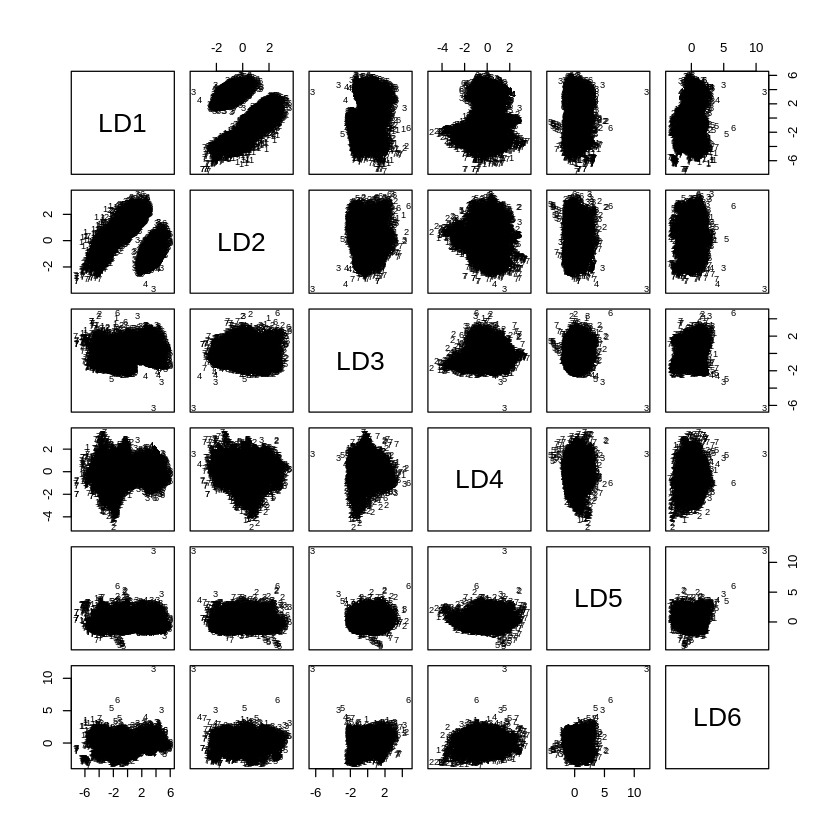

In [36]:
# Your code for activity 9 goes here....

library(MASS)

Forestcover_lda <- lda(Cover_Type ~ Elevation + Aspect + Slope + HD.Hydro + VD.Hydro + 
                       HD.Road + HD.Fire + HS.9am + HS.noon + HS.3pm + wildernessArea, data=Forestcover_train)

Forestcover_lda
plot(Forestcover_lda)


#### Asses the model accuracy

**Activity 10:** Predict the forest cover type on Forestcover_test using the model Forestcover_lda built above. Build a confusion matrix to asses the performance of the model on test set and find the accuracy of predictions. 

In [37]:
# Your code for Activity 10 goes here.

Forestcover_pred=predict(Forestcover_lda,Forestcover_test)

# Use a 2-way table or confusionMatrix function to generate confusion matrix 

conftable1 <- table(Forestcover_pred$class, Forestcover_test$Cover_Type)

# Find the accuracy of the model on test set.

In [38]:
conftable1

   
      1   2   3   4   5   6   7
  1 374 147   0   0   1   0  80
  2  89 256   2   0  74   0   0
  3   0   3 217  15   1  99   0
  4   0   3 175 610   0 135   0
  5  48 199  76   0 554  88   3
  6   2  15 178  23  18 326   0
  7 135  25   0   0   0   0 565

**Activity 11:** Fit a LDA model on Forestcover_train to predict Cover_Type using Elevation, HD.Hydro, HD.Road and HD.Fire. Name this model as Forestcover_lda1.

Call:
lda(Cover_Type ~ Elevation + HD.Hydro + HD.Road + HD.Fire, data = Forestcover_train)

Prior probabilities of groups:
        1         2         3         4         5         6         7 
0.1428571 0.1428571 0.1428571 0.1428571 0.1428571 0.1428571 0.1428571 

Group means:
  Elevation HD.Hydro   HD.Road   HD.Fire
1  3127.023 268.9279 2549.8519 1995.3988
2  2922.884 285.7083 2436.9220 2155.3373
3  2402.894 211.3485  996.7937  929.0939
4  2222.927 106.3274  919.7328  852.4610
5  2784.754 205.0946 1335.2447 1526.2255
6  2424.968 159.6475 1079.6601 1071.7784
7  3364.399 352.1759 2705.8095 2053.1356

Coefficients of linear discriminants:
                    LD1           LD2           LD3           LD4
Elevation -6.722779e-03 -0.0021045869  0.0003666048  0.0005001305
HD.Hydro   8.304692e-04  0.0011865889 -0.0035414822 -0.0037423666
HD.Road    4.262201e-05  0.0007580699 -0.0003810206  0.0005458620
HD.Fire   -1.176710e-04  0.0004109545  0.0007731400 -0.0006430841

Proportion of trace:
  

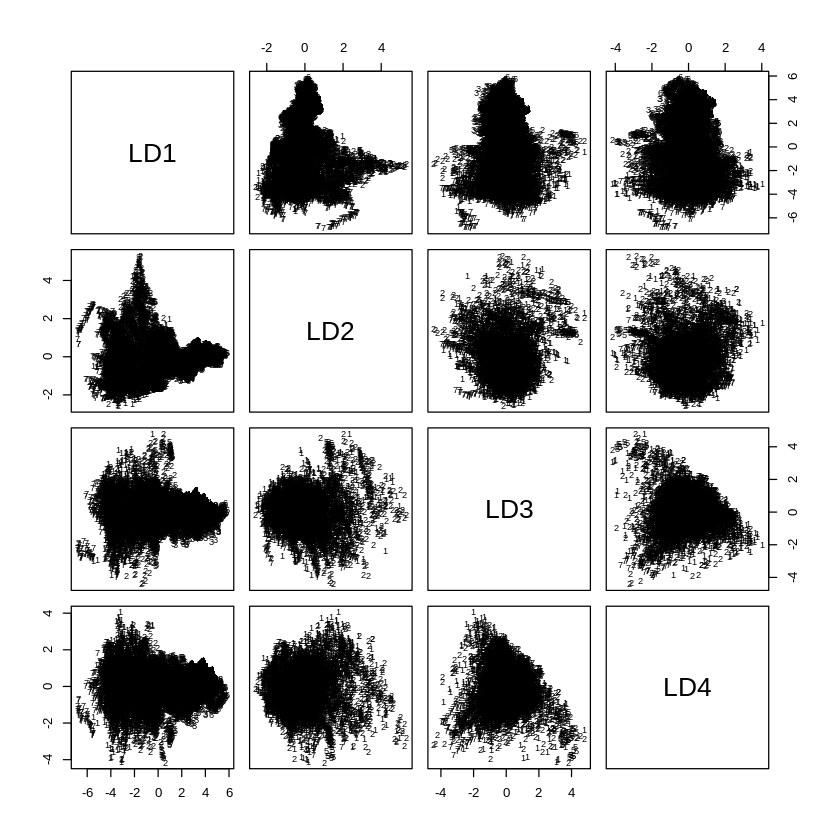

In [39]:
# Your code for Activity 11 goes here.
Forestcover_lda1 <- lda(Cover_Type ~ Elevation + HD.Hydro + HD.Road + HD.Fire, data=Forestcover_train)

Forestcover_lda1
plot(Forestcover_lda1)

**Activity 12:** Predict the forest cover type on Forestcover_test using the model Forestcover_lda1. Build a confusion matrix to asses the performance of the model on test set and find the accuracy of predictions. 

In [40]:
# Your code for Activity 12 goes here.
Forestcover_pred1=predict(Forestcover_lda1,Forestcover_test)

# Use a 2-way table or confusionMatrix function to generate confusion matrix 

conftable2 <- table(Forestcover_pred1$class, Forestcover_test$Cover_Type)
conftable2

   
      1   2   3   4   5   6   7
  1 344 139   0   0   2   0  72
  2 112 255  11   0 106   3   3
  3   1   6 187 110   7 155   0
  4   0   3 201 475   0 157   0
  5  48 183  64   0 518  95   0
  6   1  31 185  63  15 238   0
  7 142  31   0   0   0   0 573

### SVM

**Activity 13:** Fit a SVM model on Forestcover_train to predict Cover_Type using all independent variables. Use different non linear kernels like polynomial, radial, sigmoid, etc. to find the best fit. Name this model as forestcover_svmfit. 

In [41]:
library("e1071")
library(caret)

Loading required package: lattice


In [42]:
#Your code for Activity 13 goes here.

# library("e1071")
# library(caret)
    
forestcover_svmfitR <- svm(Cover_Type ~ ., data=Forestcover_train, kernel="radial", cost=100, gamma = 0.1, scale=FALSE)
summary(forestcover_svmfitR)


Call:
svm(formula = Cover_Type ~ ., data = Forestcover_train, kernel = "radial", 
    cost = 100, gamma = 0.1, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  100 

Number of Support Vectors:  10584

 ( 1512 1512 1512 1512 1512 1512 1512 )


Number of Classes:  7 

Levels: 
 1 2 3 4 5 6 7




In [43]:
pred=predict(forestcover_svmfitR, Forestcover_test)
confusionMatrix(data=pred, Forestcover_test$Cover_Type)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7
         1 647 648 648 642 646 647 648
         2   1   0   0   0   0   0   0
         3   0   0   0   0   0   0   0
         4   0   0   0   6   0   0   0
         5   0   0   0   0   2   0   0
         6   0   0   0   0   0   1   0
         7   0   0   0   0   0   0   0

Overall Statistics
                                          
               Accuracy : 0.1446          
                 95% CI : (0.1345, 0.1552)
    No Information Rate : 0.1429          
    P-Value [Acc > NIR] : 0.3734          
                                          
                  Kappa : 0.0021          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1  Class: 2 Class: 3 Class: 4  Class: 5  Class: 6
Sensitivity          0.998457 0.0000000   0.0000 0.009259 0.0030864 0.0015432
Specificity          0.002315 0.9997428   1.0000 

In [44]:
Forestcover_test

Elevation,Aspect,Slope,HD.Hydro,VD.Hydro,HD.Road,HD.Fire,HS.9am,HS.noon,HS.3pm,Cover_Type,wildernessArea,soilType
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>
2612,59,10,247,11,636,6230,228,219,124,5,1,29
2610,259,1,120,-1,607,6096,216,239,161,5,1,29
2503,38,5,85,10,741,5555,220,228,144,5,1,18
2811,135,1,212,30,3670,5643,220,238,154,2,1,12
2522,105,7,120,1,595,5569,233,231,130,5,1,18
2515,41,9,162,4,680,5532,221,220,133,5,1,18
2709,125,28,67,23,3224,6094,253,207,61,5,1,30
2533,71,9,150,-3,577,5552,230,223,126,5,1,18
2529,68,8,210,-5,666,5484,228,225,130,5,1,18


In [45]:
#forestcover_svmfitP <- svm(Cover_Type ~ ., data=Forestcover_train, kernel="polynomial", cost=10, scale=FALSE)
#forestcover_svmfitP

In [46]:
forestcover_svmfitS <- svm(Cover_Type ~ ., data=Forestcover_train, kernel="sigmoid", cost=100, gamma=0.1, scale=FALSE)
summary(forestcover_svmfitS)


Call:
svm(formula = Cover_Type ~ ., data = Forestcover_train, kernel = "sigmoid", 
    cost = 100, gamma = 0.1, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  100 
     coef.0:  0 

Number of Support Vectors:  10584

 ( 1512 1512 1512 1512 1512 1512 1512 )


Number of Classes:  7 

Levels: 
 1 2 3 4 5 6 7




In [47]:
pred=predict(forestcover_svmfitS, Forestcover_test)
confusionMatrix(data=pred, Forestcover_test$Cover_Type)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7
         1   0   0   0   0   0   0   0
         2   0   0   0   0   0   0   0
         3   0   0   0   0   0   0   0
         4 648 648 648 648 648 648 648
         5   0   0   0   0   0   0   0
         6   0   0   0   0   0   0   0
         7   0   0   0   0   0   0   0

Overall Statistics
                                          
               Accuracy : 0.1429          
                 95% CI : (0.1328, 0.1534)
    No Information Rate : 0.1429          
    P-Value [Acc > NIR] : 0.5064          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity            0.0000   0.0000   0.0000   1.0000   0.0000   0.0000
Specificity            1.0000   1.0000   1.0000   0.000

**Activity 14:** Predict the forest cover type on Forestcover_test using the model Forestcover_svmfit. Build a confusion matrix to asses the performance of the model on test set and find the accuracy of predictions. 

In [48]:
# Your code for Activity 14 goes here.

pred=predict(forestcover_svmfitS, Forestcover_test)
confusionMatrix(data=pred, Forestcover_test$Cover_Type)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7
         1   0   0   0   0   0   0   0
         2   0   0   0   0   0   0   0
         3   0   0   0   0   0   0   0
         4 648 648 648 648 648 648 648
         5   0   0   0   0   0   0   0
         6   0   0   0   0   0   0   0
         7   0   0   0   0   0   0   0

Overall Statistics
                                          
               Accuracy : 0.1429          
                 95% CI : (0.1328, 0.1534)
    No Information Rate : 0.1429          
    P-Value [Acc > NIR] : 0.5064          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity            0.0000   0.0000   0.0000   1.0000   0.0000   0.0000
Specificity            1.0000   1.0000   1.0000   0.000

**Activity 15:** Fit a SVM model on Forestcover_train to predict Cover_Type using Elevation, HD.Hydro, HD.Road and HD.Fire and soilType. Name this model as Forestcover_svmfit1. 

In [49]:
# Your code for Activity 15 goes here.
forestcover_svmfit1 <- svm(Cover_Type ~ Elevation + HD.Hydro + HD.Road + HD.Fire + soilType, 
                           data=Forestcover_train, kernel="radial", cost=10, scale=FALSE)
forestcover_svmfit1


Call:
svm(formula = Cover_Type ~ Elevation + HD.Hydro + HD.Road + HD.Fire + 
    soilType, data = Forestcover_train, kernel = "radial", cost = 10, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  10 

Number of Support Vectors:  10583


**Activity 16:** Predict the forest cover type on Forestcover_test using the model Forestcover_svmfit1. Build a confusion matrix to asses the performance of the model on test set and find the accuracy of predictions. 

In [50]:
# Your code for Activity 16 goes here.

pred=predict(forestcover_svmfit1, Forestcover_test)
confusionMatrix(data=pred, Forestcover_test$Cover_Type)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7
         1 647 646 640 603 610 620 637
         2   1   0   0   0   0   0   0
         3   0   1   4   2   0   1   0
         4   0   0   1  40   0   2   0
         5   0   0   1   0  38   0   0
         6   0   0   2   3   0  25   0
         7   0   1   0   0   0   0  11

Overall Statistics
                                          
               Accuracy : 0.1687          
                 95% CI : (0.1579, 0.1799)
    No Information Rate : 0.1429          
    P-Value [Acc > NIR] : 6.701e-07       
                                          
                  Kappa : 0.0301          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1  Class: 2  Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0.99846 0.0000000 0.0061728 0.061728 0.058642 0.038580
Specificity           0.03395 0.9997428 0.9989712 0

# Save your notebook

## Use Git to : Add, Commit, and Push all your course work!